In [6]:
import requests
import json
import numpy as np
import math
import time
import pandas as pd
import nltk
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

from PIL import Image, ImageOps
from wordcloud import WordCloud, STOPWORDS

In [7]:
%run wordart.py

In [8]:
reader = NYTReader()
#reader.getSearchTerm('headline:("California")', 100)
reader.getSearchTerm('headline:("San Francisco", "Oakland", "Silicon Valley")', 200)


In [9]:
len(reader.docs)

210

In [10]:
pos_list = [
    #'NN',
    #'NNS'
    'NNP', 
    'NNPS',
    #'JJ',
    #'JJR',
    #'JJS',
    ]
pos_exclude_list = [
    'IN',
    'TO',
    'DT',
    'CC',
]

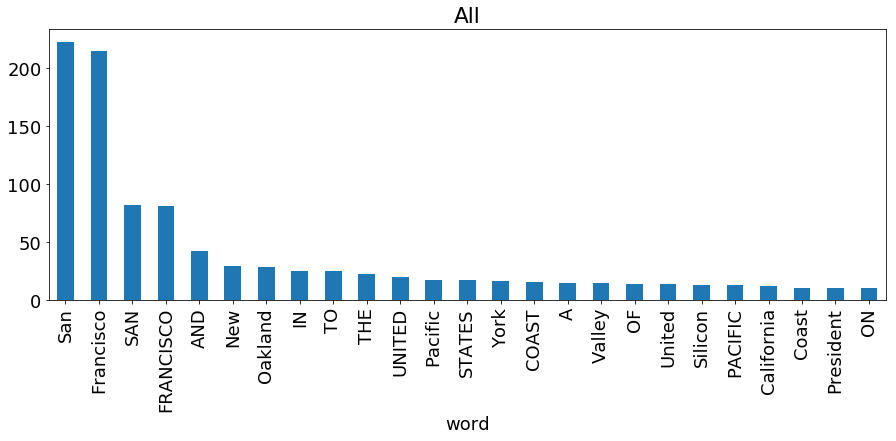

In [25]:
# Testing different types of sources

pos = pos_list
exclude = False
print_tuple = False

text = []
for source in [reader.headlines, reader.keywords, reader.snippets]:
    text.extend(source)
reader.plot_top_words(reader.df_from_text(text), "All", pos, exclude=exclude, print_tuple=print_tuple)

In [15]:
text_words = reader.df_from_text(text)['word'].tolist()

In [16]:
text_string = ' '.join(text_words)

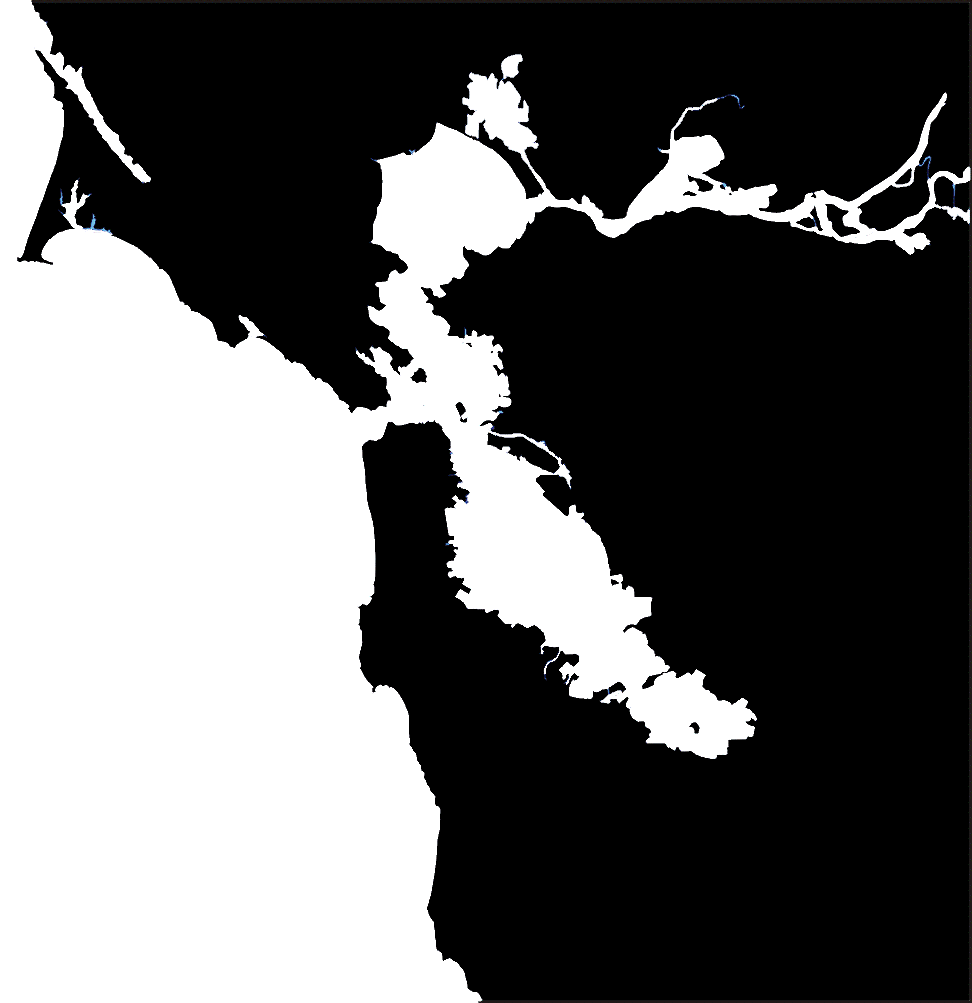

In [21]:
image = Image.open('source images/Location_Map_San_Francisco_Bay_Area_edited.gif')
#image = image.resize([int(image.size[0]/2), int(image.size[1]/2)])
image = image.convert(mode='RGB')
#image = ImageOps.invert(image)
image

In [22]:
mask = np.array(image)

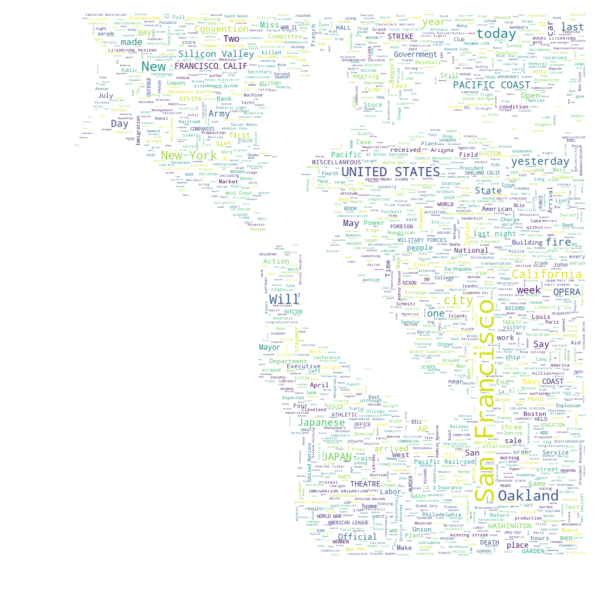

In [24]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, )#contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text_string)

# store to file
wc.to_file("final images/sf_bay.png")

# show
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency (http://stackoverflow.com/a/1963146)
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL (http://stackoverflow.com/a/1963146)
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format
        # (http://stackoverflow.com/a/8720632  and  http://stackoverflow.com/a/9459208)
        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im